In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

**1. Yorum ve anlam**

ABD’deki ailelerin yıllık dinlenme/eğlenme harcamalarını bilmek istediğimizi varsayalım. Aşağıdaki modeli tahmin ettik:

h
a
r
c
a
m
a
l
a
r
=
873
+
0.0012
∗
y
ı
l
l
ı
k
_
g
e
l
i
r
+
0.00002
∗
y
ı
l
l
ı
k
_
g
e
l
i
r
2
−
223.57
∗
c
o
c
u
k
_
s
a
h
i
b
i
 
Harcama ABD doları cinsinden eğlenme yıllık harcamasıdır, yıllık_gelir ABD doları cinsinden yıllık gelirdir ve cocuk_sahibi çocuklu aileleri gösteren değişkendir. Tahmin edilen katsayıları yorumlayınız. Yorumlarınızın istatistiksel olarak anlamlı olduğundan emin olmak için hangi ek istatistikler verilmelidir? Cevabınızı yazın ve bir Gist'e kaydedin.

Harcamalar hedef degiskenimizi Yillik Gelir1, Yillik Gelir2 ve Cocuk Sahibi Olma degiskenleri ile tahmin ettigimiz bu fonksiyonda, Eger gelirin olmadigi ve cocuk sahibi de olunmadigi durumda ABD 'deki ailelerin harcamalarinin 873 oldugunu soyleyebiliriz. 
Yillik Gelir1 'deki 1 birim artisin harcama uzerinde 0.0012 kadar artis yapacagi;
Yillik Gelir2'deki bir birimlik artisin harcama uzerinden 0.00002 kadar artis yapacagi;
Cocuk sahibi olmanin ise 223.57 birimlik bir artis yapacagi tahmin edilir.

Hata teriminin normal dağılım göstermesi seklinde bir varsayım varsa en büyük olabilirlik, hata teriminin dağılışı ile ilgili herhangi bir varsayım söz konusu değilse en-küçük kareler tekniği kullanılarak parametreler tahmin edilebir.

Degisken katsayilarinin P degerlerine bakilarak anlamliligi tartisilabilir.  Eğer model için bulunan p değeri <0.05 ise regresyon katsayısı 0’dan farklıdır yani iki değişken arasındaki ilişki istatistiksel olarak önemlidir, iki
değişken arasında doğrusal bir ilişki vardır.


**2. Hava durumu modeli**
Bu alıştırmada, önceki dersteki sıcaklık verileriyle çalışacaksınız. Bu ödevi tamamlamak için, gist dosyasına, aşağıdaki görevlere ilişkin çözümlerinizi içeren Jupyter notebook'u bir link olarak ekleyin:

* İlk olarak, Sıcaklık verilerini Kaggle'dan indirin. 

* Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir? 

* Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.

**1.İlk olarak, Sıcaklık verilerini Kaggle'dan indirin.**

In [2]:
sicaklik = pd.read_csv('data/weatherHistory.csv')
sicaklik.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


**2.Hedef değişkeninizin görünür sıcaklık ve sıcaklık arasındaki fark olduğu doğrusal bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem ve rüzgar hızı kullanın. Şimdi, modelinizi OLS kullanarak tahmin edin. Tahmin edilen katsayılar istatistiksel olarak anlamlı mıdır? Tahmini katsayılar önceki beklentileriniz doğrultusunda mı? Tahmin edilen katsayıları yorumlayınız. Hedef ve açıklayıcı değişkenler arasındaki ilişkiler nelerdir?**

In [3]:
sicaklik_farki = sicaklik['Temperature (C)'] - sicaklik['Apparent Temperature (C)'] 

In [4]:
Y = sicaklik_farki
X = sicaklik[['Humidity','Wind Speed (km/h)']] 

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [3.02918594 0.11929075]
Sabit değer (bias): 
 -2.4381054151877017


In [7]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:01:01   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.4381      0.021   -115.948      0.000      -2.479      -2.397
Humidity              3.0292      0.024    126.479      0.000       2.982       3.076
Wind Speed (km/h)     0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

sicaklik_farki1 = -2.4381 + 3.0292*(Humidity)+ 0.1193*(Wind Speed (km/h))

Nemdeki bir birim degisme Sicaklik farkinda 3.0292 kadar bir artisa neden olurken; ruzgarin hizi 0.1193 kadar artisa neden olur.

Katsayilarin P degerleri 0'a yakin olduklari icin birbirleriyle oldukca anlamli oldugunu soyleyebiliriz. 
Onceki sonuclarimizda hedef degiskenimiz 'Apparent Temperature (C)'idi ve aciklayici degiskenler halen anlamliydi. 


**3.Ardından, yukarıdaki modele nem ve rüzgar hızı etkileşimini dahil edin ve OLS'yi kullanarak modeli tahmin edin. Katsayılar istatistiksel olarak anlamlı mıdır? Nem ve rüzgar hızı için tahmini katsayıların işaretleri değişti mi? Tahmin edilen katsayıları yorumlayınız.**

In [8]:
sicaklik['Nem_Ruzgar_etkilesimi'] =sicaklik['Humidity'] * sicaklik['Wind Speed (km/h)']

In [9]:
Y = sicaklik_farki
X = sicaklik[['Humidity','Wind Speed (km/h)','Nem_Ruzgar_etkilesimi' ]] 

In [10]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-0.17751219 -0.09048213  0.29711946]
Sabit değer (bias): 
 -0.0839363100978221


In [12]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:01:01   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0839      0.033     -2.511      0.012      -0.149      -0.018
Humidity                 -0.1775      0.043     -4.133      0.000      -0.262      -0.093
Wind Speed (km/h)        -0.0905      0.002    -36.797      0.000      -0.095      -0.086
Nem_Ruzgar_etkilesimi     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**sicaklik_farki = -0.0839 -0.1775*(Humidity)-0.0905*(Wind Speed (km/h)+ 0.2971*(Nem_Ruzgar_etkilesimi)** denklemimizde degiskenlerin katsayilarinin yeni degiskenin eklenmesiyle sicaklikta negatif bir etki ettigini goruyoruz. 

Artik sicaklik farkinda nemdeki bir birimlik degisme 0.1775 kadar sicakligi dusururken; 
Ruzgarin hizindaki bir birimlik degisim sicakligi 0.0905 kadar dusurmektedir;
Nem Ruzgar etkilesimi ise sicaklik uzerinde pozitif bir etki yaratarak bir birimlik degisim 0.2971 kadar sicakligi arttirir. 

Yeni degisken eklenmesiyle sicaklik farki dengesini korumak adina ilk fonksiyonumuzdan farkli olarak katsayilar degismistir.(sicaklik_farki = -2.4381 + 3.0292X(Humidity)+ 0.1193X3(Wind Speed (km/h))

**3. Ev fiyatları modeli**
Bu alıştırmada, ev fiyatları modelinizi yorumlayacaksınız. Bu ödevi tamamlamak için, gist dosyasına, aşağıdaki görevlere ilişkin çözümlerinizi içeren Jupyter notebook'u bir link olarak ekleyin:

* Ev Fiyatları verilerini Kaggle'dan indirin.

* Ev fiyatları modelinizi tekrar çalıştırın ve sonuçları yorumlayın. Hangi özellikler istatistiksel olarak anlamlı ve hangileri değildir?

* Şimdi, anlamsız özellikleri modelinizden hariç tutun. Bir şey değişti mi?

* Ev fiyatları ile olan ilişkilerini belirleyerek istatistiksel olarak anlamlı katsayıları yorumlayın. Ev fiyatları üzerinde hangi özellikler daha belirgin bir etkiye sahiptir?

* Sonuçlar size mantıklı geliyor mu? Değilse, potansiyel nedenleri açıklamaya çalışın.

***Ev Fiyatları verilerini Kaggle'dan indirin.***

In [13]:
ev_fiyatlari = pd.read_csv('data/train.csv')
ev_fiyatlari.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
ev_fiyatlari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [15]:
toplam = ev_fiyatlari.isnull().sum()

yuzde = (ev_fiyatlari.isnull().sum()/ev_fiyatlari.isnull().count())

In [16]:
Null_degerler = pd.concat([toplam, yuzde], axis=1, keys = ['toplam', 'yuzde'])


In [17]:
Null_degerler.toplam.sort_values(ascending= False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
Name: toplam, dtype: int64

In [18]:
Bos_ham_hucre_toplami = ev_fiyatlari.isnull().sum()*100/len(ev_fiyatlari)
Bos_ham_hucre_toplami.head()

Id             0.000
MSSubClass     0.000
MSZoning       0.000
LotFrontage   17.740
LotArea        0.000
dtype: float64

In [19]:
Kolon_Listesi = list(Bos_ham_hucre_toplami.sort_values(ascending=False).index[0:20])

In [20]:
ev_fiyatlari_filled = ev_fiyatlari.copy()

In [21]:
fill_list_int = ['LotFrontage', 'MasVnrArea',  'GarageYrBlt'] 

In [22]:
for col in fill_list_int:
    ev_fiyatlari_filled.loc[:,col].interpolate(inplace=True)

In [23]:
enterpolate_snrsi__hucre_toplami = ev_fiyatlari_filled[['LotFrontage','MasVnrArea','GarageYrBlt']].isnull().sum()*100/len(ev_fiyatlari)
enterpolate_snrsi__hucre_toplami

LotFrontage   0.000
MasVnrArea    0.000
GarageYrBlt   0.000
dtype: float64

In [24]:
#Kategorik degiskenlerin doldurulmasi
fill_list_str = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish',
                 'GarageQual','GarageCond', 'Fence']

In [25]:
for col in fill_list_str:
    print(ev_fiyatlari_filled[col].fillna(ev_fiyatlari_filled[col].mode(),inplace=True))

None
None
None
None
None
None
None


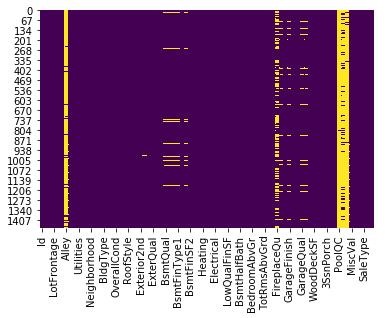

In [26]:
sns.heatmap(ev_fiyatlari_filled.isnull(),cbar= False, cmap='viridis' )

In [27]:
ev_fiyatlari_droppped =  ev_fiyatlari_filled.drop(['Alley','MiscFeature', 'PoolQC'], axis =1 )

In [28]:
corr_matrix = ev_fiyatlari_droppped.corr()
corr_matrix.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.011,-0.009,-0.033,-0.028,0.013,-0.013,-0.022,-0.051,-0.005,...,-0.030,-0.000,0.003,-0.047,0.001,0.057,-0.006,0.021,0.001,-0.022
MSSubClass,0.011,1.000,-0.352,-0.140,0.033,-0.059,0.028,0.041,0.023,-0.070,...,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.014,-0.021,-0.084
LotFrontage,-0.009,-0.352,1.000,0.278,0.223,-0.050,0.111,0.075,0.164,0.200,...,0.067,0.117,-0.005,0.054,0.038,0.162,-0.012,0.014,0.010,0.311
LotArea,-0.033,-0.140,0.278,1.000,0.106,-0.006,0.014,0.014,0.104,0.214,...,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,0.001,-0.014,0.264
OverallQual,-0.028,0.033,0.223,0.106,1.000,-0.092,0.572,0.551,0.409,0.240,...,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,0.071,-0.027,0.791


In [29]:
 print(corr_matrix.SalePrice.sort_values(ascending=False)[1:11])

OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
YearRemodAdd   0.507
Name: SalePrice, dtype: float64


***Ev fiyatları modelinizi tekrar çalıştırın ve sonuçları yorumlayın. Hangi özellikler istatistiksel olarak anlamlı ve hangileri değildir?***

In [30]:
Y = ev_fiyatlari_droppped['SalePrice']

X = ev_fiyatlari_droppped[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [31]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.68240707e+02  3.31050771e+01 -6.79087146e+03  1.41737355e+01
  1.98650991e+01  1.49475334e+01  1.04179010e+04  5.12971178e+01
  1.96045898e+04  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661674


In [33]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:01:02   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*Ev fiyatlari = -1.186 + 2.6824*YearBuilt +3.31050*TotRmsAbvGrd-6.7908*FullBath + 1.4173*1stFlrSF +1.9865*TotalBsmtSF + 1.4947*GarageArea + 1.0417*GarageCars +5.1297*GrLivArea + 1.9604*OverallQual + 2.9648*YearRemodAdd

TotRmsAbvGrd ve GarageArea degiskenleri p degerleri yuksek oldugu icin modelden cikariyoruz. 
  

**** Şimdi, anlamsız özellikleri modelinizden hariç tutun. Bir şey değişti mi?***

In [34]:
Y = ev_fiyatlari_droppped['SalePrice']

X = ev_fiyatlari_droppped[['YearBuilt', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
                           'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [35]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.69889971e+02 -7.18377849e+03  1.46511561e+01  2.03846645e+01
  1.39510419e+04  5.17669244e+01  1.95867751e+04  2.95740619e+02]
Sabit değer (bias): 
 -1188025.7254260632


In [37]:
X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     618.9
Date:                Sun, 14 Apr 2019   Prob (F-statistic):               0.00
Time:                        23:01:02   Log-Likelihood:                -17460.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1451   BIC:                         3.499e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.188e+06   1.28e+05     -9.255      0.000   -1.44e+06   -9.36e+05
YearBuilt      269.8900     50.169      5.380      0.000     171.478     368.302
FullBath     -7183.7785   2643.957     -2.717      0.007   -1.24e+04   -1997.392
1stFlrSF        14.6512      4.919      2.979      0.003       5.002      24.300
TotalBsmtSF     20.3847      4.269      4.775      0.000      12.010      28.759
GarageCars    1.395e+04   1816.623      7.680      0.000    1.04e+04    1.75e+04
GrLivArea       51.7669      3.097     16.714      0.000      45.692      57.842
OverallQual   1.959e+04   1188.062     16.486      0.000    1.73e+04    2.19e+04
YearRemodAdd   295.7406     63.618      4.649      0.000     170.947     420.534
==============================================================================
Omnibus:                      462.446   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54365.371
Skew:                          -0.355   Prob(JB):                         0.00
Kurtosis:                      32.886   Cond. No.                     4.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***Ev fiyatları ile olan ilişkilerini belirleyerek istatistiksel olarak anlamlı katsayıları yorumlayın. Ev fiyatları üzerinde hangi özellikler daha belirgin bir etkiye sahiptir?***

***Sonuçlar size mantıklı geliyor mu? Değilse, potansiyel nedenleri açıklamaya çalışın.***

**Ilk Denklem:**
*Ev fiyatlari = -1.186 + 2.6824*YearBuilt +3.31050*TotRmsAbvGrd-6.7908*FullBath + 1.4173*1stFlrSF +1.9865*TotalBsmtSF +                         1.4947*GarageArea + 1.0417*GarageCars +5.1297*GrLivArea + 1.9604*OverallQual + 2.9648*YearRemodAdd

**Ikinci denklem:**
*Ev fiyatlari = -1.18802 + 2.6988*YearBuilt-7.1837*FullBath +1.46511*1stFlrSF + 2.0384*TotalBsmtSF +
                1.3951*GarageCars +5.1766*GrLivArea +1.9586*OverallQual + 2.9574*YearRemodAdd


Modeldeki degiskenler anlamlidir. 